# Python Crush Course for Astronomy
## In this section you will learn how to use `pandas` and `scikit-learn` to classify galaxies and QSOs. Full courses are [here](https://hebl.china-vo.org/course/PIA2020/)
- Principle Components Analysis
- RandomForest
- K-Nearest Neighbors

**All the codes are hosted on [GitHub](https://github.com/QYQSDTC/PythonForAstro)**

![National Astronomical Data Center](NADC.png)

In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
import joblib

In [6]:
import os
path = os.path.join(os.getcwd(), '')
path

'/Users/yiqianqian/Library/Mobile Documents/com~apple~CloudDocs/Development/Study/Python天文培训/'

# EDA(Exploratory Data Analysis)

In [7]:
galaxies = pd.read_csv(path+'galaxy_standardised.csv')

In [8]:
qsos = pd.read_csv(path+'qso_standardised.csv')

In [9]:
spectras = galaxies.append(qsos)
spectras

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
0,0.681851,1.050349,1.049781,1.396499,0.476251,0.281340,0.332309,0.628823,1.245539,0.593891,...,0.763551,1.195300,0.624017,0.038890,0.606046,1.060182,1.026270,0.862841,0.792763,2
1,0.202487,0.452222,0.415216,0.326322,-0.142812,0.673388,-0.314992,-0.603042,-0.618028,0.564282,...,1.169122,1.164361,1.104328,1.190664,1.251922,1.102004,1.137212,1.148413,1.096388,2
2,0.026333,0.425043,0.498109,0.659205,0.799043,0.707678,0.063159,0.363943,0.191890,0.258519,...,1.088988,1.288522,1.321881,1.250971,1.062590,0.606214,1.167233,1.161760,1.221769,2
3,2.434612,0.935888,1.498360,2.749564,-4.290839,0.933611,-1.846549,-2.638741,3.254681,6.561919,...,0.227328,3.912542,1.507647,1.808368,3.615018,-1.025419,0.740085,0.959148,0.903798,2
4,0.060074,-0.249441,-0.116810,-0.366151,0.053911,-0.108872,-0.353303,-1.691500,0.489297,0.296942,...,0.987686,1.159409,2.387209,0.812236,0.605982,0.136379,0.881807,0.774123,0.713271,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.033119,1.291462,1.987855,1.098799,1.098675,1.456265,1.312584,1.203994,2.432322,2.187198,...,0.701652,1.542238,0.385102,0.055573,0.085119,0.843885,0.500277,0.446302,0.380252,3
1996,1.507452,2.638492,2.225653,2.445091,1.616653,1.694815,2.142550,0.991155,1.629717,2.169326,...,0.373972,0.377893,0.390296,0.285465,0.514991,0.449190,0.439753,0.426261,0.368943,3
1997,5.490154,2.292381,4.777272,4.812428,2.821025,2.487228,2.745795,2.386737,4.523126,4.862374,...,0.306764,0.586475,2.627289,3.227365,3.228829,2.180633,0.321340,0.240931,0.318271,3
1998,1.187816,0.278300,1.072821,2.017602,-1.659811,3.752539,1.631088,-0.207987,-0.200479,1.149489,...,1.438905,0.698069,-6.245606,-2.093496,5.167622,-3.191413,-1.243816,-1.055808,-1.177740,3


In [11]:
spectras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 975 to 373
Columns: 2551 entries, 0 to type
dtypes: float64(2550), int64(1)
memory usage: 77.9 MB


In [12]:
spectras.describe()

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-1.188986,3.454414,2.310543,-0.148534,-1.806794,2.143961,-2.160115,-0.597732,-4.251481,-4.243426,...,0.816732,1.153058,0.630404,0.687846,0.761819,0.743507,0.651693,0.623877,0.688174,2.500000
std,113.492148,109.674905,55.198599,299.146835,136.671283,188.925418,194.526218,85.626467,269.558045,342.949690,...,1.970020,4.178878,13.194347,3.263284,6.267819,6.186622,2.746236,1.668429,1.663179,0.500063
min,-5541.585747,-150.701666,-239.872333,-15916.557167,-6669.568745,-6539.992075,-12214.278550,-4788.914502,-16193.960055,-21685.310413,...,-60.602831,-156.887529,-719.120461,-42.620049,-249.538927,-48.073113,-145.473788,-85.419992,-87.853404,2.000000
25%,0.360810,0.376295,0.410139,0.393239,0.367631,0.391448,0.420709,0.364825,0.343137,0.415926,...,0.486267,0.497975,0.368309,0.275554,0.376489,0.343058,0.449177,0.443128,0.482530,2.000000
50%,0.951607,0.941343,1.002984,0.937007,0.953456,0.971538,1.034289,0.957274,0.921758,0.998134,...,0.800146,0.893092,0.824108,0.776316,0.819958,0.751473,0.745164,0.700189,0.726565,2.500000
75%,1.952434,2.026195,1.957950,1.976362,1.936378,1.961808,2.007836,1.969515,1.974726,2.014540,...,1.040213,1.324205,1.195029,1.127616,1.181194,1.057756,0.978583,0.946065,0.963798,3.000000
max,444.020769,6487.962400,3339.339124,10222.117374,152.627086,9994.718837,51.432428,74.763203,89.926812,95.168510,...,64.727497,100.218661,313.598868,95.215741,247.474465,303.149101,57.562166,33.617036,29.239707,3.000000


In [10]:
spectras= shuffle(spectras)
spectras

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
975,1.870145,2.586898,2.460162,0.561155,2.083262,-0.914886,-0.091990,1.640706,1.961055,3.580210,...,1.145668,2.887127,-0.905125,-2.165577,8.879605,0.440283,0.126431,0.480911,0.839396,3
1297,2.318054,1.134078,-0.027065,1.081619,2.200879,0.259235,1.049287,2.761969,2.399454,0.900848,...,0.371919,0.193134,0.062160,0.253056,0.464901,0.210802,0.376030,0.471352,0.377864,3
976,0.217787,0.790141,0.227823,1.298045,0.664759,0.768546,1.417448,2.078839,1.784559,-0.059303,...,1.252031,4.294569,-0.635425,1.371455,-0.993233,1.492832,0.645959,0.470861,0.487790,3
879,0.294233,0.367385,0.154303,0.242836,0.140450,0.133965,0.140873,0.252473,0.488699,0.178148,...,1.137148,1.132038,1.108327,1.136264,1.055331,1.069611,1.091538,1.103561,1.143768,2
129,0.537344,1.400378,1.289138,0.891434,1.885464,0.320796,1.022564,0.473372,0.384657,0.725696,...,0.378269,0.168859,0.378206,0.411597,0.996538,0.495458,0.484383,0.341140,0.497063,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,7.109349,6.649168,12.444035,2.440570,15.720368,0.401049,-1.878166,-0.721720,4.557639,0.866362,...,0.837752,-0.001230,2.784687,0.324877,-3.661362,8.602006,1.332441,0.730109,1.135951,3
961,1.196310,2.124210,1.837717,1.496418,1.110807,1.705189,1.718881,1.307810,1.668772,1.494634,...,0.841413,1.350070,1.668063,0.237152,0.986955,0.786800,0.689592,0.690849,0.708836,3
579,0.653596,0.547893,0.516872,0.575610,0.553789,0.619898,0.604894,0.582305,0.563698,0.560819,...,0.865266,0.849980,0.838413,0.854984,0.857095,0.872257,0.847249,0.844787,0.856271,3
1266,1.923216,1.983664,0.553953,0.569399,-0.011430,4.662244,1.479023,1.406806,2.352868,2.208764,...,-1.190771,-1.929984,0.990263,2.023600,-2.174463,-2.519378,-3.778038,-0.853478,-0.048878,3


In [13]:
X_train, X_test, y_train, y_test = train_test_split(spectras.iloc[:,0:2550],spectras['type'], test_size=0.2, random_state=110)

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
171,2.544753,1.432211,0.805966,0.620681,1.443512,1.404833,0.451558,1.831501,2.451561,1.617759,...,0.774752,1.745448,3.277438,-0.136757,-0.417871,-0.764334,-0.512212,0.769178,0.452445,0.628376
1697,2.803189,2.391370,2.280290,1.788680,2.111614,2.107480,2.090901,1.619393,1.786559,1.739066,...,0.357434,0.176145,0.036552,0.251414,0.389626,0.376270,0.001486,0.202597,0.146656,0.428878
1373,4.928352,10.325668,1.633044,5.339534,4.739487,-3.949991,1.475309,7.219612,-0.647508,5.376313,...,0.156218,0.498270,1.821573,1.196549,2.439604,-1.154329,-1.736373,0.234250,-0.018835,0.085800
1336,-0.142164,0.192202,1.296868,1.702698,0.560422,1.954413,2.263664,0.193301,1.039258,0.554631,...,0.884225,1.515947,4.236023,3.442416,-4.779972,-5.915160,-1.015399,0.142889,0.976920,0.568766
1996,0.537349,0.363373,0.372906,0.368687,0.443242,0.426041,0.400352,0.374236,0.279396,0.324774,...,1.099798,1.073068,1.108928,1.058375,1.105826,1.084293,1.076030,1.038988,1.062860,1.040319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1.696944,2.722431,2.024515,2.813326,2.242586,1.557059,2.748837,2.181827,0.597494,1.260285,...,0.275204,0.163080,0.155254,0.612325,5.634695,0.229540,1.090745,0.240188,0.513125,0.512904
841,1.120113,2.062311,1.765880,0.877448,1.798216,1.365683,1.881824,0.058743,1.112164,1.292584,...,0.740041,2.422904,12.610060,10.094764,-2.897160,-2.312285,1.528304,1.039663,0.488112,0.754670
353,1.313895,1.017041,1.003076,0.862907,1.341225,0.574869,0.488642,0.492869,0.712730,1.153229,...,0.882263,1.030388,0.975099,0.777682,0.952220,0.599427,0.779949,0.841349,0.834283,0.844624
1499,-0.305495,1.786372,0.313782,1.091991,1.245878,-0.520842,-0.120409,-0.042886,1.465125,1.093291,...,1.234605,2.514769,3.694783,1.804457,5.449420,5.065243,2.738564,1.125403,0.657913,1.059500


In [15]:
y_train

171     3
1697    3
1373    3
1336    3
1996    2
       ..
1074    3
841     3
353     2
1499    3
1891    3
Name: type, Length: 3200, dtype: int64

# Normalizaion vs. Standardlization
## Normalizaion
Normalization is also known as  Min-Max scaling:
$$X^{'}=\frac{X-X_{\rm{min}}}{X_{\rm{max}} - X_{\rm{min}}}$$
It is typically used to rescale features into the range [0,1].

## Standardlization
Standardiztion is to rescale features into a normal distribution:
$$X^{'}=\frac{X-\mu}{\sigma}$$
where $\mu$, $\sigma$ is the mean and standard deviation of the features.

## Normalization or Standardization?
- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

**NOTE: ONLY APPLY ON FEATURES, KEEP TARGETS UNTOUCHED**

In [16]:
scaler = MinMaxScaler().fit(X_train) # normalization

In [17]:
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [18]:
scaler = StandardScaler().fit(X_train_minmax) # standardization

In [19]:
X_train_std = scaler.transform(X_train_minmax)
X_test_std = scaler.transform(X_test_minmax)

# Principle Componants Analysis

In [24]:
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
    Number of components to keep.
    if n_componen

In [20]:
pca = PCA(n_components=3) # Principle components analysis
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [21]:
X_train_pca

array([[-0.50954971,  0.67813464,  0.75317093],
       [-0.83916471,  2.8706687 ,  2.56895759],
       [-1.03048036,  4.45828984,  4.37794939],
       ...,
       [-0.33327175, -2.75478466, -1.52246302],
       [ 0.1115672 , -9.20898683, -7.76348274],
       [-0.77570764, -2.49742366, -1.13177058]])

/var/folders/fs/n2w57x6j4rx87rzzzxxf_z4m0000gn/T/ipykernel_30102/3044242223.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'component 3')

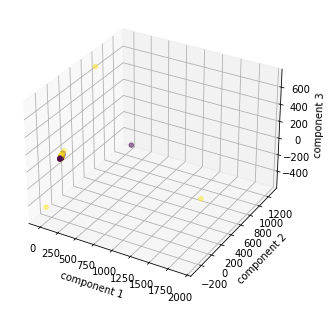

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca[:,0],X_train_pca[:,1],X_train_pca[:,2],c=y_train,alpha=0.5)
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
# plt.show()

In [ ]:
# ax = plt.figure()
# plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train,alpha=0.5)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('Spectra after PCA(components=2)')
# plt.show()

Text(0, 0.5, 'cumulative explained variance')

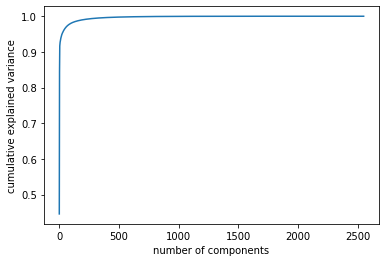

In [23]:
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# plt.show()

In [25]:
pca = PCA(n_components=500)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca

array([[-0.50954971,  0.67813464,  0.75317093, ..., -0.0203529 ,
         0.06497503, -0.06548564],
       [-0.83916471,  2.8706687 ,  2.56895759, ...,  0.09111316,
        -0.04972143,  0.01216149],
       [-1.03048036,  4.45828984,  4.37794939, ...,  0.15541386,
        -0.22190466,  0.34968829],
       ...,
       [-0.33327175, -2.75478466, -1.52246302, ...,  0.20563736,
        -0.05775928,  0.07202982],
       [ 0.1115672 , -9.20898683, -7.76348274, ...,  0.15288852,
         0.14932602,  0.08399012],
       [-0.77570764, -2.49742366, -1.13177058, ..., -0.30188893,
        -0.2417808 , -0.08569219]])

In [26]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [27]:
rf = RandomForestClassifier(oob_score=True)

In [28]:
rf.fit(X_train,y_train)

/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(oob_score=True)

In [29]:
y_predict_rf = rf.predict(X_test)

In [30]:
y_predict_rf

array([2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3,

In [31]:
y_predict_proba_rf = rf.predict_proba(X_test)
y_predict_proba_rf

array([[0.62, 0.38],
       [0.06, 0.94],
       [1.  , 0.  ],
       ...,
       [0.09, 0.91],
       [0.03, 0.97],
       [1.  , 0.  ]])

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test,y_predict_rf)
cnf_matrix

array([[347,  52],
       [ 21, 380]])

/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


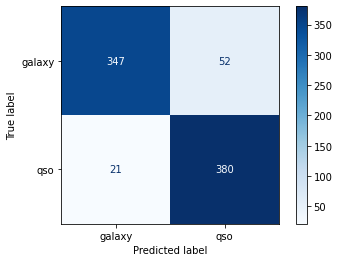

In [33]:
class_names = ['galaxy','qso']
metrics.plot_confusion_matrix(rf, X_test, y_test,display_labels=class_names,
                                 cmap=plt.cm.Blues,values_format='g')

# Confusion Matrix
- True Positives : The cases in which we predicted YES and the actual output was also YES.
- True Negatives : The cases in which we predicted NO and the actual output was NO.
- False Positives : The cases in which we predicted YES and the actual output was NO. Also known as `False Alarm Rate`
- False Negatives : The cases in which we predicted NO and the actual output was YES.

In [34]:
print(metrics.classification_report(y_test,y_predict_rf,target_names=['galaxy','qso']))

              precision    recall  f1-score   support

      galaxy       0.94      0.87      0.90       399
         qso       0.88      0.95      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



# Classification Evaluation Metrics
- Accuracy: number of correct predictions divided by the total number of predictions
- Precision= True_Positive/ (True_Positive+ False_Positive)
- Recall= True_Positive/ (True_Positive+ False_Negative)
- F1-score= 2\*Precision\*Recall/(Precision + Recall)

In [35]:
metrics.roc_auc_score(y_test, y_predict_rf)

0.908652554078463

In [36]:
rf.oob_score_

0.9115625

/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


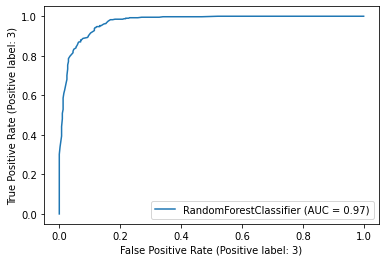

In [37]:
metrics.plot_roc_curve(rf, X_test, y_test)

# Rreceiver Operating Characteristic Curve (ROC) \& Area Under Curve (AUC)
## ROC curve is essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values. ROC curve is a popular curve to look at overall model performance and pick a good cut-off threshold for the model.
## The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant).

In [38]:
importance = rf.feature_importances_

In [39]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00013
Feature: 1, Score: 0.00044
Feature: 2, Score: 0.00021
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.00013
Feature: 5, Score: 0.00039
Feature: 6, Score: 0.00025
Feature: 7, Score: 0.00027
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.00062
Feature: 11, Score: 0.00034
Feature: 12, Score: 0.00090
Feature: 13, Score: 0.00065
Feature: 14, Score: 0.00153
Feature: 15, Score: 0.00045
Feature: 16, Score: 0.00068
Feature: 17, Score: 0.00065
Feature: 18, Score: 0.00091
Feature: 19, Score: 0.00032
Feature: 20, Score: 0.00065
Feature: 21, Score: 0.00056
Feature: 22, Score: 0.00076
Feature: 23, Score: 0.00004
Feature: 24, Score: 0.00121
Feature: 25, Score: 0.00100
Feature: 26, Score: 0.00028
Feature: 27, Score: 0.00021
Feature: 28, Score: 0.00065
Feature: 29, Score: 0.00187
Feature: 30, Score: 0.00077
Feature: 31, Score: 0.00107
Feature: 32, Score: 0.00073
Feature: 33, Score: 0.00013
Feature: 34, Score: 0.00044
Feature: 35, Score: 0.00017
Fe

<BarContainer object of 2550 artists>

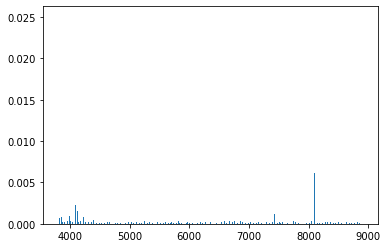

In [40]:
plt.bar([3800 + 2 * x for x in range(len(importance))], importance)
# plt.show()

In [41]:
indices = np.argsort(importance)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, 3800+2*indices[f], importance[indices[f]]))

Feature ranking:
1. feature 8096 (0.025042)
2. feature 8092 (0.021235)
3. feature 8072 (0.019135)
4. feature 4034 (0.016218)
5. feature 8100 (0.015995)
6. feature 8242 (0.015428)
7. feature 8374 (0.015326)
8. feature 8248 (0.015024)
9. feature 8560 (0.014572)
10. feature 3976 (0.012520)
11. feature 8094 (0.011581)
12. feature 8320 (0.010372)
13. feature 8070 (0.010364)
14. feature 8114 (0.010316)
15. feature 8252 (0.010270)
16. feature 8156 (0.010127)
17. feature 8260 (0.010009)
18. feature 8180 (0.009998)
19. feature 8240 (0.009774)
20. feature 8172 (0.009704)
21. feature 8330 (0.009669)
22. feature 8006 (0.009550)
23. feature 8332 (0.009076)
24. feature 4062 (0.007451)
25. feature 3978 (0.006798)
26. feature 8098 (0.006114)
27. feature 8112 (0.005955)
28. feature 8060 (0.005703)
29. feature 8522 (0.005539)
30. feature 8008 (0.005325)
31. feature 8266 (0.005293)
32. feature 8168 (0.005172)
33. feature 8082 (0.005142)
34. feature 4024 (0.005104)
35. feature 8604 (0.005095)
36. feature 

In [42]:
cv_scores = cross_val_score(rf,X_train,y_train,cv=3)
mean = np.mean(cv_scores)

/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
mean

0.9081217583857765

In [45]:
param_test= {'n_estimators':range(10,101,10)}  
gsearch= GridSearchCV(estimator = RandomForestClassifier(),  
                       param_grid =param_test, scoring='roc_auc',cv=5)

In [46]:
gsearch.fit(X_train,y_train)  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(10, 101, 10)},
             scoring='roc_auc')

In [47]:
gsearch.best_params_

{'n_estimators': 80}

In [48]:
gsearch.best_score_

0.971847588137915

# K-Nearest Neighbors

In [49]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_predict_proba_knn = knn.predict_proba(X_test_pca)

In [52]:
print(f"Dimension of X_train_pca is ({len(X_train_pca)},{len(X_train_pca[0])})")

Dimension of X_train_pca is (3200,500)


In [53]:
print(f"Dimension of X_test_pca is ({len(X_test_pca)}, {len(X_test_pca[0])})")

Dimension of X_test_pca is (800, 500)


In [54]:
y_predict_proba_knn

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [55]:
y_predict_knn = knn.predict(X_test_pca)

In [56]:
y_predict_knn

array([2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3,

In [57]:
print(metrics.classification_report(y_test,y_predict_knn,target_names=['galaxy','qso']))

              precision    recall  f1-score   support

      galaxy       0.91      0.89      0.90       399
         qso       0.90      0.91      0.90       401

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [58]:
metrics.roc_auc_score(y_test, y_predict_knn)

0.9012337577109857

/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/yiqianqian/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


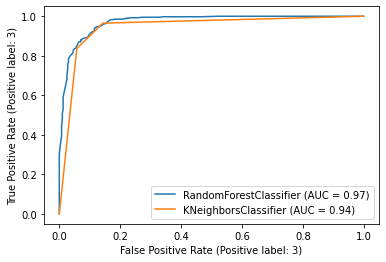

In [59]:
metrics.plot_roc_curve(rf, X_test, y_test)
ax = plt.gca()
metrics.plot_roc_curve(knn, X_test_pca, y_test, ax = ax)
# plt.show()